In [7]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load dataset splits

train = pd.read_csv("csv_splits/train_split.csv")
test = pd.read_csv("csv_splits/test_split.csv")
val = pd.read_csv("csv_splits/val_split.csv")


In [11]:
def plot_class_distribution(split, title, axis):
    sns.countplot(y=split["phase"], order=split["phase"].value_counts().index, ax=axis, color="royalblue")
    axis.set_title(title)
    axis.set_xlabel("Count")
    axis.set_ylabel("Phase Label")

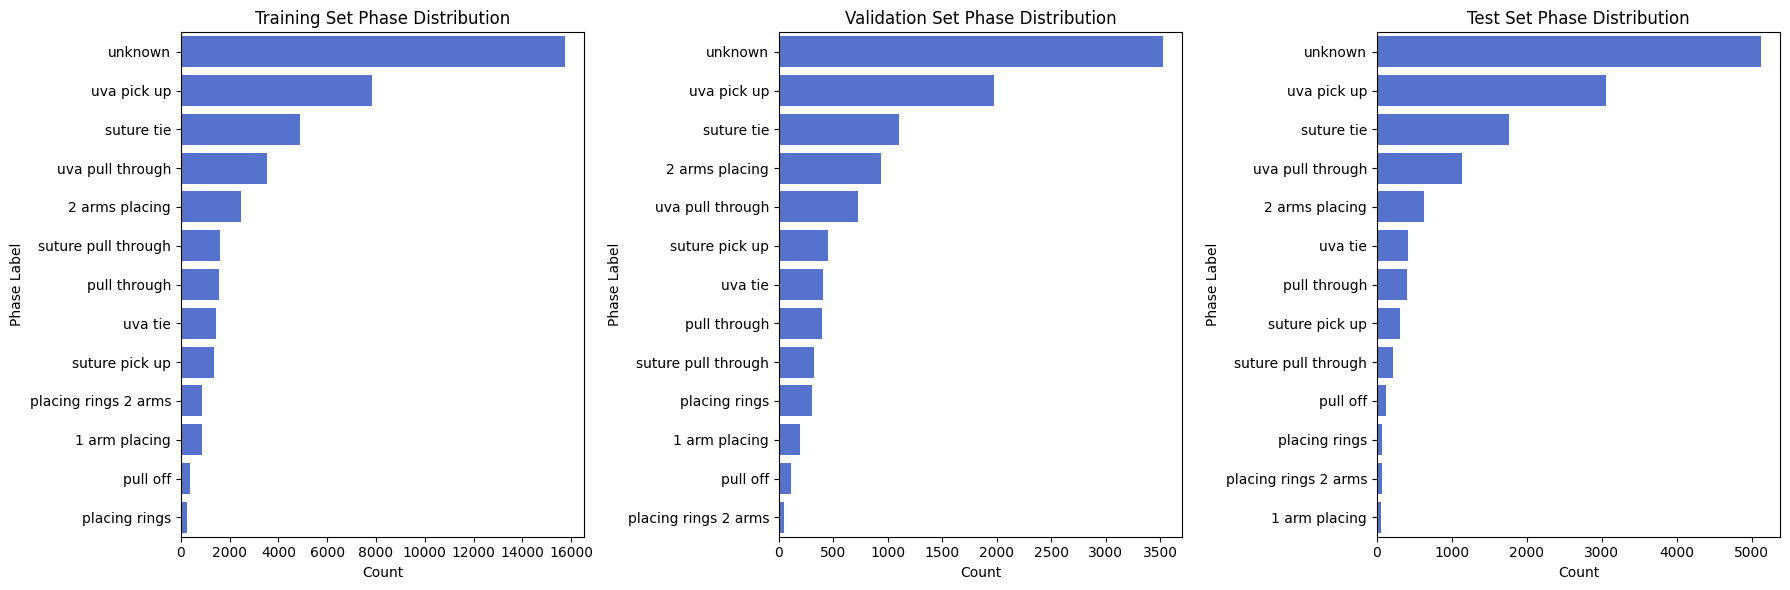

In [46]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

output_path = "../../reports/visuals/training_splits/training_splits_bar.png"

# Plot for each split
plot_class_distribution(train, "Training Set Phase Distribution", axes[0])
plot_class_distribution(val, "Validation Set Phase Distribution", axes[1])
plot_class_distribution(test, "Test Set Phase Distribution", axes[2])


plt.savefig(output_path, dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

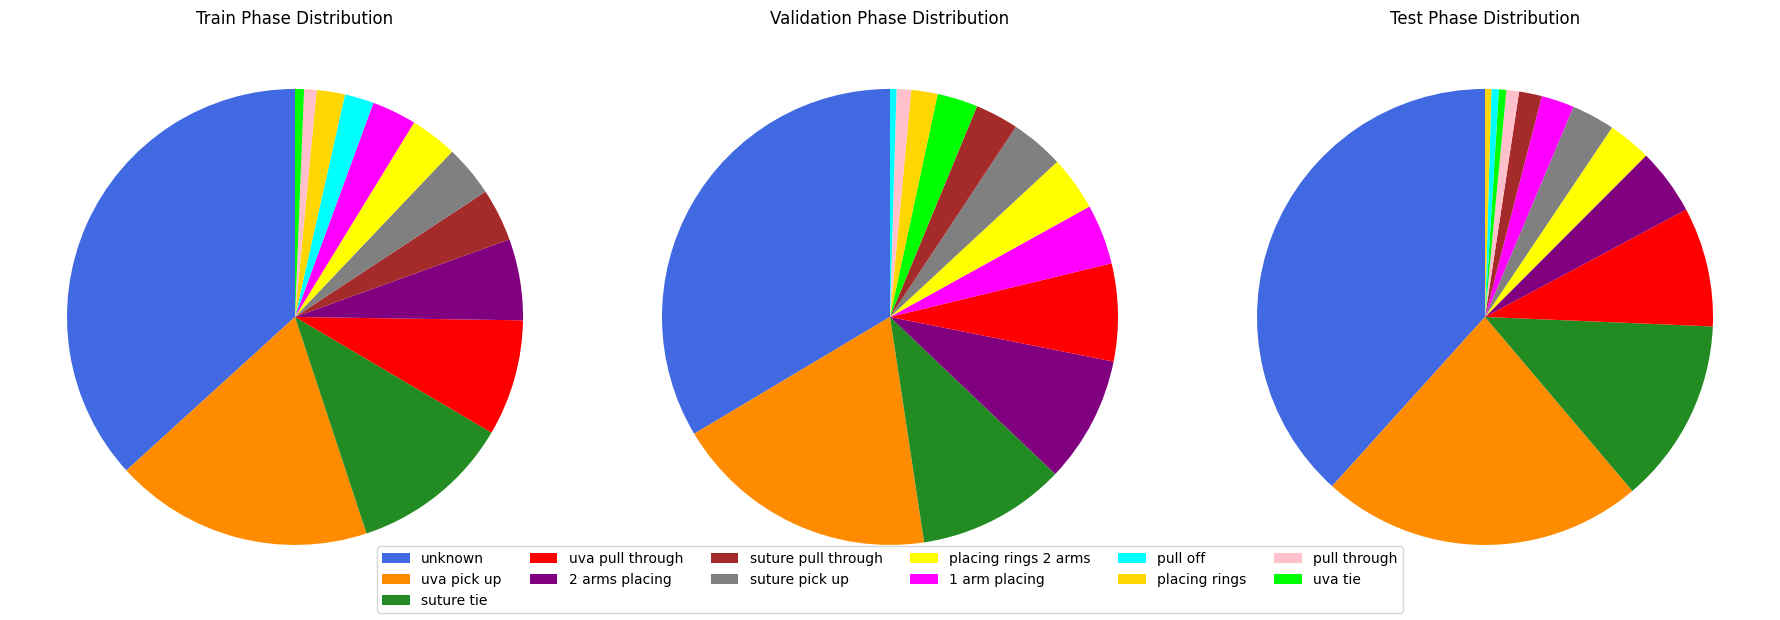

Phase distribution plot saved successfully!


In [50]:
# Define consistent colors for each phase
phase_colors = {
    "unknown": "royalblue",
    "uva pick up": "darkorange",
    "suture tie": "forestgreen",
    "uva pull through": "red",
    "2 arms placing": "purple",
    "suture pull through": "brown",
    "suture pick up": "magenta",
    "placing rings 2 arms": "cyan",
    "1 arm placing": "gold",
    "pull off": "pink",
    "placing rings": "lime",
    "pull through": "gray",
    "uva tie" : "yellow"
}

# Function to plot a pie chart without labels or percentages
def plot_pie_chart(df, title, ax):
    phase_counts = df["phase"].value_counts()
    colors = [phase_colors.get(phase, "black") for phase in phase_counts.index]  # Use predefined colors
    wedges, _ = ax.pie(
        phase_counts, startangle=90, colors=colors  # No labels or percentages
    )
    ax.set_title(title)
    return wedges

# Create pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for each split and store wedge objects for the legend
wedges_train = plot_pie_chart(train, "Train Phase Distribution", axes[0])
plot_pie_chart(val, "Validation Phase Distribution", axes[1])
plot_pie_chart(test, "Test Phase Distribution", axes[2])

# Create a single legend (use wedges from train)
fig.legend(wedges_train, phase_colors.keys(), loc="lower center", ncol=6, fontsize=10)

plt.tight_layout()
"feature_extraction/split_dataset/phase_distribution.png"
# Save the figure before displaying
output_path="../../reports/visuals/training_splits/training_splits_pie.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

print("Phase distribution plot saved successfully!")
